In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [3]:
from IPython.display import display

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/arunn/Desktop/data/train_image',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('C:/Users/arunn/Desktop/data/test_image',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [10]:
batch_size=20
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 400/batch_size,
epochs = 10,
validation_data = test_set,
validation_steps = 30/batch_size)

Epoch 1/10
20/20 [==============================] - 50s 2s/step - loss: 2.0982 - accuracy: 0.6299 - val_loss: 0.3483 - val_accuracy: 0.8438
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.4206 - accuracy: 0.7997 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 3/10
20/20 [==============================] - 46s 2s/step - loss: 0.3721 - accuracy: 0.8526 - val_loss: 0.5430 - val_accuracy: 0.8438
Epoch 4/10
20/20 [==============================] - 47s 2s/step - loss: 0.3023 - accuracy: 0.8717 - val_loss: 0.4145 - val_accuracy: 0.8049
Epoch 5/10
20/20 [==============================] - 45s 2s/step - loss: 0.2805 - accuracy: 0.8717 - val_loss: 0.3751 - val_accuracy: 0.8906
Epoch 6/10
20/20 [==============================] - 47s 2s/step - loss: 0.2103 - accuracy: 0.9151 - val_loss: 0.3296 - val_accuracy: 0.9062
Epoch 7/10
20/20 [==============================] - 44s 2s/step - loss: 0.1855 - accuracy: 0.9342 - val_loss: 0.3394 - val_accuracy: 0.8293
Epoch 8/10
20/20 [==

In [11]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

 Total:  201
Loss:  0.23284384608268738 Accuracy:  0.859375


In [6]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
#import cv2

In [9]:
classifier.save('C:/Users/arunn/Desktop/model/Gmodel.h5')

In [7]:
target_size = (256,256)
model=load_model('C:/Users/arunn/Desktop/model/Gmodel.h5')
print("model loaded")

model loaded


not Glaucoma


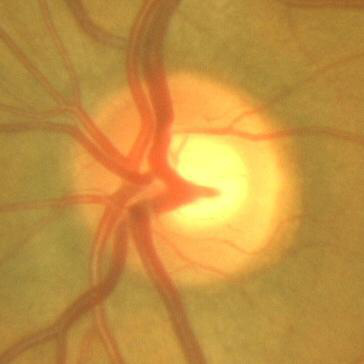

In [8]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\arunn\Desktop\data\test_image\healthy\Im139_ACRIMA.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("not Glaucoma")
else:
 print(" Glaucoma")
display(Image.open(r'C:\Users\arunn\Desktop\data\test_image\healthy\Im139_ACRIMA.jpg'))

Glaucoma


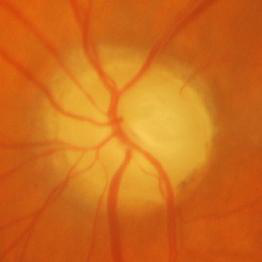

In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\arunn\Desktop\data\test_image\glucoma\Im426_g_ACRIMA.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("not Glaucoma")
else:
 print("Glaucoma")
display(Image.open(r'C:\Users\arunn\Desktop\data\test_image\glucoma\Im426_g_ACRIMA.jpg'))

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model['binary_accuracy'])+1),model['acc'],metrics="binary_accuracy")
    axs[0].plot(range(1,len(model['val_acc'])+1),model['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model['acc'])+1),len(model['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model['loss'])+1),model['loss'])
    axs[1].plot(range(1,len(model['val_loss'])+1),model['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model['loss'])+1),len(model['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

TypeError: 'Sequential' object is not subscriptable

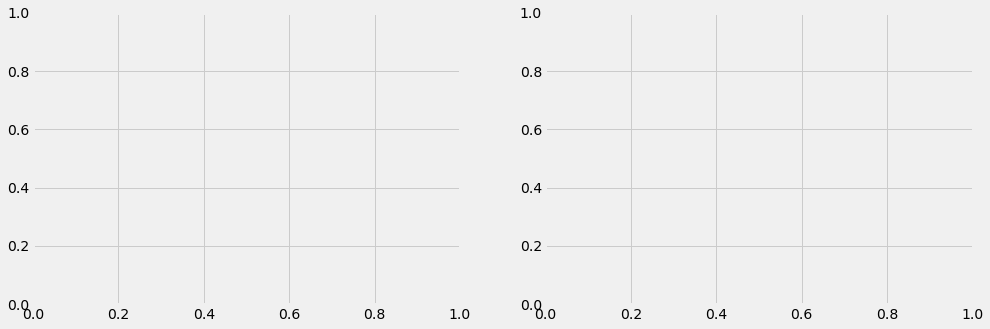

In [28]:
plot_model_history(model)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

Text(0.5, 1.0, 'Training and validation loss')

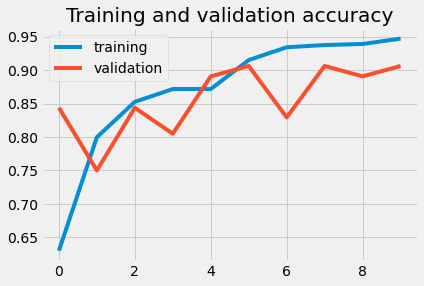

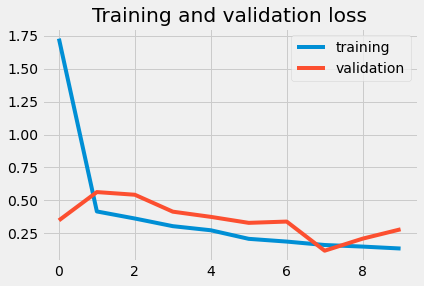

In [14]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = model_info.history['loss']
val_loss = model_info.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')